# FIB-SEM Registration (FFT)

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html

http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html

https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/

Maybe I should be doing everything in terms of a homography matrix, then everything is matrix multiply.

In [1]:
%matplotlib inline
import numpy as np
# better image reader than np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
# three different registration packages
# not dft based
import cv2
# dft based
from skimage.feature import register_translation as register_translation_base

In [2]:
from dphplotting import display_grid

In [3]:
%load_ext autoreload
%autoreload 2
from imreg_dph import *

In [4]:
# AffineTransform Tests
af1 = AffineTransform(translation=(1, 2))
af2 = AffineTransform(translation=(5, 3))
af3 = af1 @ af2
assert np.array_equal(af3.translation, (6, 5))
assert af3 == af2 @ af1

af1 = AffineTransform(rotation=2)
af2 = AffineTransform(rotation=1)
af3 = af1 @ af2
assert af3.rotation == 3
assert af3 == af2 @ af1

In [5]:
# testing
from skimage.data import astronaut
from skimage.color import rgb2gray

In [6]:
astro = rgb2gray(astronaut())

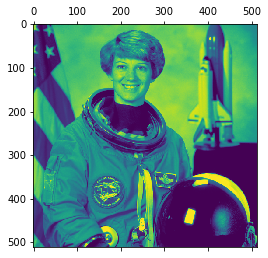

In [7]:
plt.matshow(astro)

In [8]:
logpolar(astro)[1]

1.0115737902145781

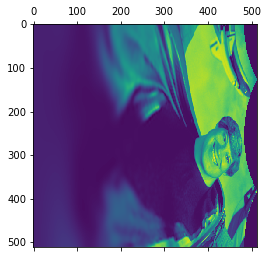

In [9]:
plt.matshow(logpolar(astro)[0])

In [10]:
def dual_registration(im0, im1, warp_mode = cv2.MOTION_AFFINE):
    af0 = similarity(im0, im1)
    im2 = warp(im1, af0).astype(im0.dtype)
    af1 = register_ECC(im0, im2, warp_mode=warp_mode)
    return af0 @ af1

In [11]:
def drive_meth(im0, af_forward, meth, *args, **kwargs):
    im1 = warp(im0, af_forward).astype(im0.dtype)
    af_backward = meth(im0, im1, *args, **kwargs)
    print(af_backward)
    print("Residuals are ", af_backward @ af_forward)
    im2 = warp(im1, af_backward)
    to_plot = {"1 Original" : im0, "2 Warped" : im1, "3 Unwarped" : im2, "4 Difference": im0-im2}
    display_grid(to_plot)

# Test similarity

<AffineTransform: translation = [-151.14  298.96], rotation =-57.30, scale = [ 1.11  1.11], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.44  0.64], rotation =-0.01, scale = [ 1.  1.], shear = 0.00>
<AffineTransform: translation = [-87.52  30.42], rotation =-8.02, scale = [ 0.94  1.1 ], shear = -14.57>
Residuals are  <AffineTransform: translation = [ 180.07  -39.92], rotation =42.35, scale = [ 1.05  0.78], shear = -2.16>


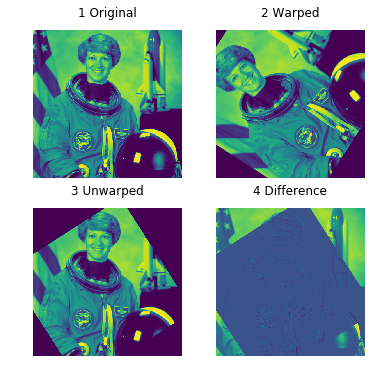

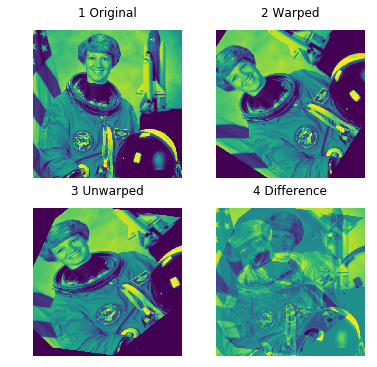

In [12]:
af_similar = AffineTransform(rotation = 1, scale = (0.9, 0.9), translation=(300.2, -30.3))
drive_meth(astro, af_similar, similarity)
drive_meth(astro.astype(np.float32), af_similar, register_ECC, warp_mode = cv2.MOTION_AFFINE)

<AffineTransform: translation = [-149.63  299.4 ], rotation =-57.30, scale = [ 1.11  1.1 ], shear = -0.07>
Residuals are  <AffineTransform: translation = [ 1.54  1.92], rotation =-0.09, scale = [ 1.    0.99], shear = 0.09>


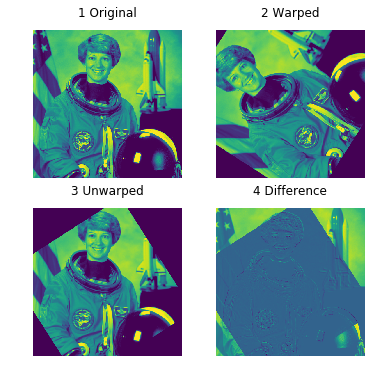

In [13]:
drive_meth(astro.astype(np.float32), af_similar, dual_registration)

# Test euclidean

data.shape = (3, 2)
<AffineTransform: translation = [-136.57  269.05], rotation =-57.30, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.09  0.05], rotation =-0.01, scale = [ 1.  1.], shear = 0.00>
<AffineTransform: translation = [-2.47  2.52], rotation =-0.44, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 297.49  -30.08], rotation =56.86, scale = [ 1.  1.], shear = 0.00>
data.shape = (3, 2)
<AffineTransform: translation = [-136.43  269.38], rotation =-57.33, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.12  0.33], rotation =-0.03, scale = [ 1.  1.], shear = 0.00>


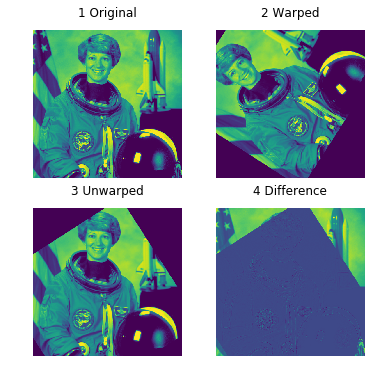

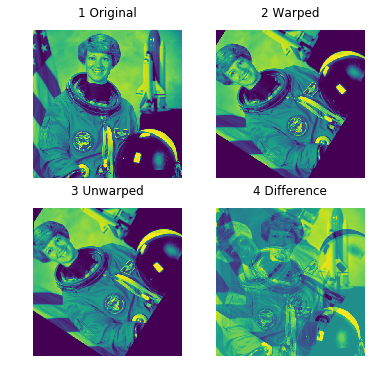

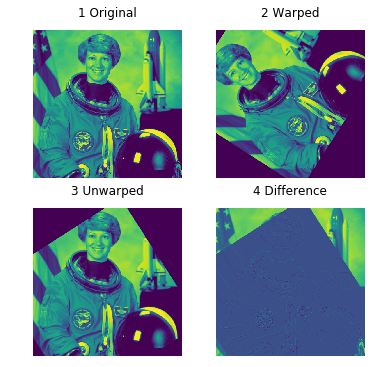

In [14]:
af_euclidean = AffineTransform(rotation = 1, translation=(300.2, -30.3))
drive_meth(astro, af_euclidean, similarity)
drive_meth(astro.astype(np.float32), af_euclidean, register_ECC, warp_mode = cv2.MOTION_EUCLIDEAN)
drive_meth(astro.astype(np.float32), af_euclidean, dual_registration, warp_mode = cv2.MOTION_EUCLIDEAN)

data.shape = (3, 2)
<AffineTransform: translation = [-92.8   50.12], rotation =-11.60, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [-0.74  0.29], rotation =-0.14, scale = [ 1.  1.], shear = 0.00>
<AffineTransform: translation = [-92.28  49.72], rotation =-11.47, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [-0.1   0.09], rotation =-0.01, scale = [ 1.  1.], shear = 0.00>
data.shape = (3, 2)
<AffineTransform: translation = [-91.66  49.57], rotation =-11.40, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.57  0.06], rotation =0.06, scale = [ 1.  1.], shear = 0.00>


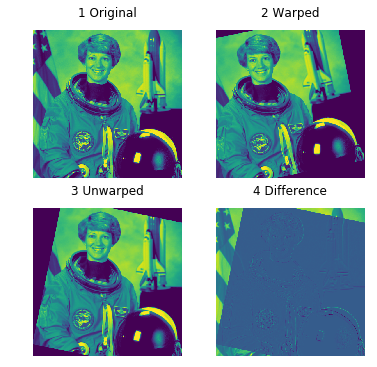

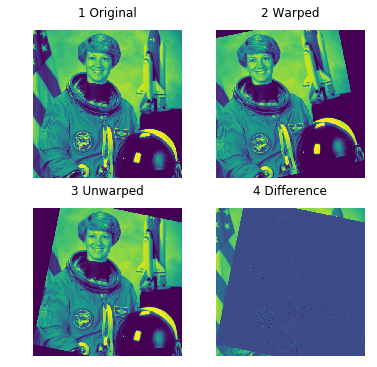

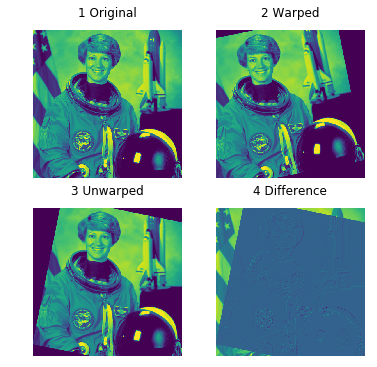

In [15]:
af_euclidean = AffineTransform(rotation = .2, translation=(100.2, -30.3))
drive_meth(astro, af_euclidean, similarity)
drive_meth(astro.astype(np.float32), af_euclidean, register_ECC, warp_mode = cv2.MOTION_EUCLIDEAN)
drive_meth(astro.astype(np.float32), af_euclidean, dual_registration, warp_mode = cv2.MOTION_EUCLIDEAN)

# Test translation only

<AffineTransform: translation = [-19.99  49.99], rotation =0.00, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.11 -0.26], rotation =0.00, scale = [ 1.  1.], shear = -0.00>
<AffineTransform: translation = [-20.08  50.19], rotation =0.00, scale = [ 1.  1.], shear = 0.00>
Residuals are  <AffineTransform: translation = [ 0.02 -0.06], rotation =0.00, scale = [ 1.  1.], shear = -0.00>
<AffineTransform: translation = [-20.13  50.35], rotation =0.00, scale = [ 1.  1.], shear = -0.00>
Residuals are  <AffineTransform: translation = [-0.03  0.1 ], rotation =0.00, scale = [ 1.  1.], shear = -0.00>


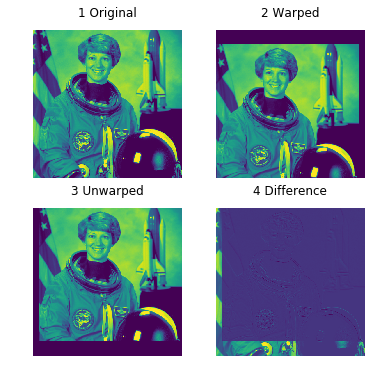

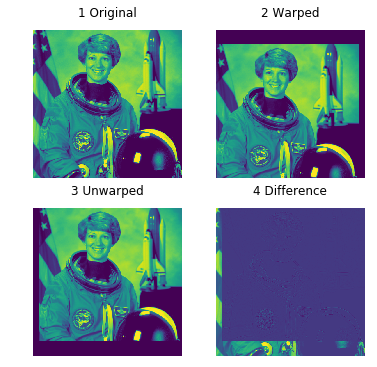

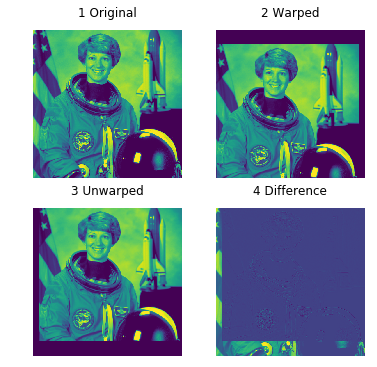

In [16]:
af_trans = AffineTransform(translation=(20.1, -50.25))
drive_meth(astro, af_trans, translation)
drive_meth(astro, af_trans, register_translation)
drive_meth(astro.astype(np.float32), af_trans, register_ECC, warp_mode = cv2.MOTION_TRANSLATION)

`register_translation` is clearly more accurate than mine.

# OpenCV

In [17]:
def cv_warp(im, af, shape=None, **kwargs):
    """Driver function for cv2.warpAffine
    cv::INTER_NEAREST = 0, 
    cv::INTER_LINEAR = 1, 
    cv::INTER_CUBIC = 2, 
    cv::INTER_AREA = 3, 
    cv::INTER_LANCZOS4 = 4, """
    if shape is None:
        shape = im.shape
    default_kwargs = dict(flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    default_kwargs.update(kwargs)
    return cv2.warpAffine(im, af.params[:2], shape[::-1], **default_kwargs)

In [18]:
%timeit warp(astro, af_similar)
%timeit cv_warp(astro, af_similar)
astro2 = warp(astro, af_similar)
astro3 = cv_warp(astro, af_similar)

100 loops, best of 3: 12.2 ms per loop
1000 loops, best of 3: 1.09 ms per loop


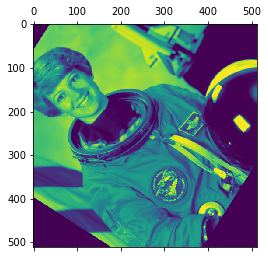

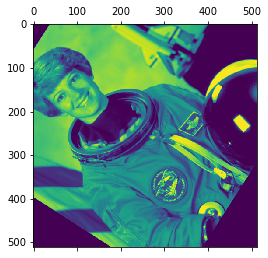

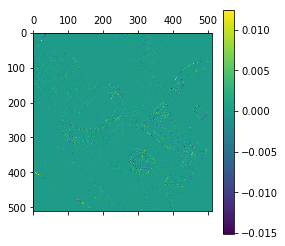

In [19]:
plt.matshow(astro2)
plt.matshow(astro3)
plt.matshow(astro2 - astro3)
plt.colorbar()